<div>
<img style="float:right" width="400" height="80" src="https://www.thecitizen.co.tz/resource/blob/3432734/0b58f8bae31c0a00d86d810f152af6ba/smartphone-pic-data.jpg">
</div>

# Mobile Price
**T5 Data Science Bootcamp**
### Table of Contents
- [Introduction](#Introduction)
- [Part 1 - Imports](#Imports)
- [Part 2 - Load Data](#Load)
- [Part 3 - Data Formating](#Dataformating)
- [Part 4 - Exploartory Data Analysis](#Exploartory)
- [Part 5 - Feauture ](#Feauture)
- [Part 6 - Experimentations](#Experimentations)
- [Part 7 - BASELINE ](#BASELINE)
- [Part 8 - LASSO ](#LASSO)
- [Part 9 - Polynomial](#Polynomial)
- [Part 10 - Conclusion](#Conclusion)

<a id='Imports'></a>

# Libraries Imports

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas_profiling import ProfileReport
from plotly.offline import iplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf 
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<a id='Load'></a>

# Load data

In [64]:
traindf=pd.read_csv("amobile.csv")
# settings to display all columns
pd.set_option("display.max_columns", None)
# display the dataframe head
traindf.head()

,Unnamed: 0,battery_power,blue,speed_m,dual_sim,fc,4G,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,3G,touch_screen,wifi,price_range,price
0,0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,762
1,1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,855
2,2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,898
3,3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,833
4,4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,784


In [65]:
# traindf.profile_report()

 <a id='Dataformating'></a>

 # Data Formating

In [66]:
traindf.rename(columns={'clock_speed': 'speed_m' ,'four_g': '4G' , 'three_g':'3G'}, inplace=True)
traindf.drop(['Unnamed: 0'],axis =1, inplace=True)

In [67]:
traindf

,battery_power,blue,speed_m,dual_sim,fc,4G,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,3G,touch_screen,wifi,price_range,price
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,762
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,855
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,898
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,833
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0,212
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2,988
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3,1174
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0,248


In [68]:
## summary of columns data types 
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   speed_m        2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   4G             2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  3G             2000 non-null   int64  
 18  touch_sc

In [69]:
#traindf.price_range.value_counts()

In [70]:
#df = traindf.copy()

In [71]:
#def price_to_cont(i):
#    if i == 0:
#        return np.random.randint(200, 501)
 #   elif i == 1:
#        return np.random.randint(501, 801)
 #   elif i == 2:
  #      return np.random.randint(801, 1000)
  #  else :
  #      return np.random.randint(1001, 1200)

In [72]:
#df["price"] = df.price_range.apply(price_to_cont)

In [73]:
#df.price.head()

In [74]:
traindf.head(20)


,battery_power,blue,speed_m,dual_sim,fc,4G,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,3G,touch_screen,wifi,price_range,price
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,762
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,855
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,898
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,833
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,784
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1,599
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3,1198
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0,473
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0,230
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0,321


In [75]:
# describe dataset 
traindf.describe()

,battery_power,blue,speed_m,dual_sim,fc,4G,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,3G,touch_screen,wifi,price_range,price
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000,750.400500
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314,290.689894
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,201.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000,501.500000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000,800.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000,999.500000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000,1199.000000


In [76]:
# shape dataset 
print('Number of rows are :',traindf.shape[0], ',and number of columns are :',traindf.shape[1])

Number of rows are : 2000 ,and number of columns are : 22


In [77]:
# List all columns names in the dataset
traindf.columns

Index(['battery_power', 'blue', 'speed_m', 'dual_sim', 'fc', '4G',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', '3G', 'touch_screen',
       'wifi', 'price_range', 'price'],
      dtype='object')

In [78]:
# detect unique data in columns
traindf.nunique()

battery_power    1094
blue                2
speed_m            26
dual_sim            2
fc                 20
4G                  2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
3G                  2
touch_screen        2
wifi                2
price_range         4
price             870
dtype: int64

In [79]:
len(traindf['ram'].unique())
##Too many different values for RAM

1562

In [80]:
# how many duplicats in the data
traindf.duplicated().sum() 

0

In [81]:
# show the null coloumn
traindf.isnull().sum()

# No missing values

battery_power    0
blue             0
speed_m          0
dual_sim         0
fc               0
4G               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
3G               0
touch_screen     0
wifi             0
price_range      0
price            0
dtype: int64

In [82]:
traindf['price_range'].unique()
#There are 4 price ranges 0,1,2,3  

array([1, 2, 3, 0], dtype=int64)

 <a id='Exploartory'></a>
 
# Exploartory Data Analysis

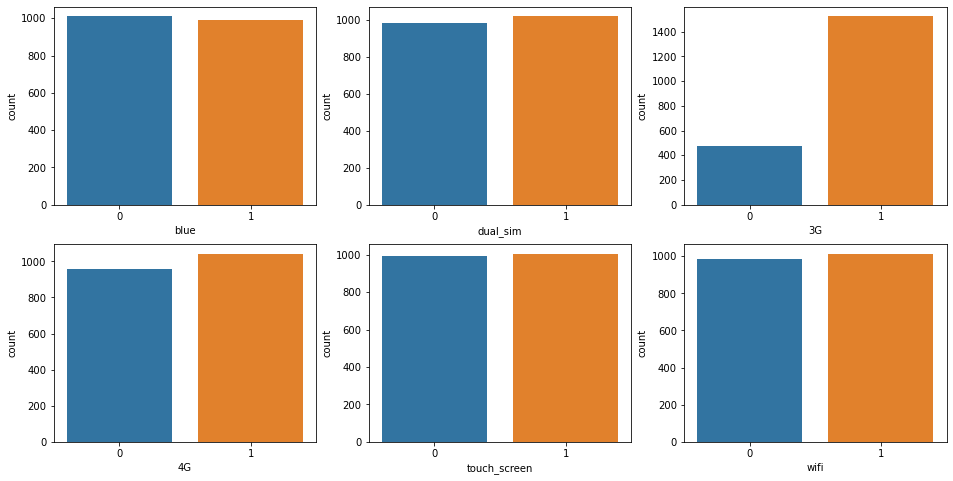

In [83]:
col=['blue',"dual_sim","3G","4G","touch_screen",'wifi']
plt.figure(figsize=(16,8))
i=1
k=0
for j in col:
    if i!=7:
        plt.subplot(2,3,i)
        sns.countplot(traindf[col[k]])
        k=k+1
    else:
        break
    i=i+1

### This shows the different price  and how they are evenly distributed

<AxesSubplot:title={'center':'Scatterplot'}, xlabel='price', ylabel='battery_power'>

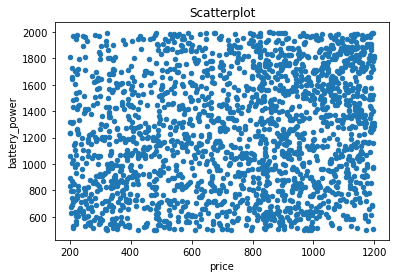

In [84]:
traindf.plot.scatter(x='price', y='battery_power', title='Scatterplot') 

#### How many phones are 3G supported?

In [85]:
plt.figure(figsize=(7,8))
px.pie(traindf['3G'].value_counts().reset_index(),values= '3G', names = ['3G', 'No 3G'] , hole =0.6)

<Figure size 504x576 with 0 Axes>

#### How many phones are 4G supported?

In [86]:
plt.figure(figsize=(7,8))
px.pie(traindf['4G'].value_counts().reset_index(),values= '4G', names = ['4G', 'No 4G'] , hole =0.6)

<Figure size 504x576 with 0 Axes>

In [87]:
fig = px.pie(traindf['blue'].value_counts().reset_index(), values = 'blue',
             names = ['No', 'Yes'])
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.6, 
                  marker = dict(colors = ['#C2A7B5','#DE1A82'],
                                line = dict(color = 'white', width = 3)))

fig.update_layout(annotations = [dict(text = 'Bluetooth', 
                                      x = 0.5, y = 0.5,
                                      font_size = 24, showarrow = False, 
                                      font_family = 'Verdana',
                                      font_color = 'black')],
                  showlegend = False)
                  
fig.show()

In [88]:
dualplot = px.pie(traindf['dual_sim'].value_counts().reset_index(), values = 'dual_sim', names = ['Dual', 'Not-Dual'] , hole = 0.5, color_discrete_sequence = ['#229CE2','#7CAFCC'] )
dualplot
# about half the phones had dual sims

In [89]:
fig = px.pie(traindf['wifi'].value_counts().reset_index(), values = 'wifi',
             names = ['Yes', 'No'])
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.6, 
                  marker = dict(colors = ['#41EF13','#57A742'],
                                line = dict(color = 'white', width = 3)))

fig.update_layout(annotations = [dict(text = 'Wifi', 
                                      x = 0.5, y = 0.5,
                                      font_size = 24, showarrow = False, 
                                      font_family = 'Verdana',
                                      font_color = 'black')],
                  showlegend = False)
                  
fig.show()

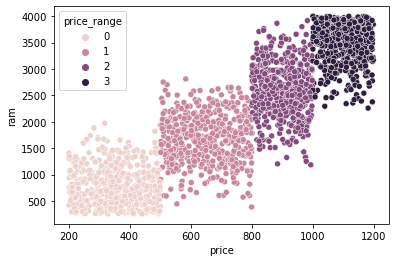

In [90]:
sns.scatterplot(traindf['price'],traindf['ram'],traindf['price_range']);

In [91]:
#sns.pairplot(traindf) 
#plt.show()

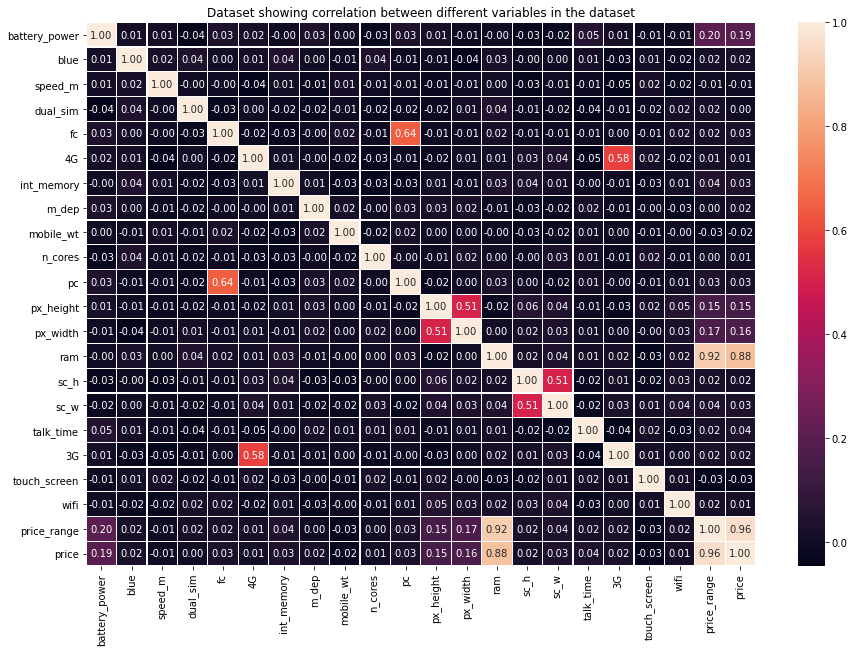

In [92]:
corr = traindf.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=.2,)
plt.title('Dataset showing correlation between different variables in the dataset')
plt.show()

<a id='Feauture'></a>

# Feature Selections

In [93]:
columns = list(traindf.columns)
columns.remove('price')

In [94]:
features =columns
label = ['price']
X = traindf[features]
y = traindf[label]

In [95]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=100)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=100)
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train_val)}')
print(f'Total # of sample in test dataset: {len(X_test)}')
print(f'Total # of sample in train_Val dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_val)}')

Total # of sample in whole dataset: 2000
Total # of sample in train dataset: 1600
Total # of sample in test dataset: 400
Total # of sample in train_Val dataset: 1280
Total # of sample in validation dataset: 320


# Linear Regression

<a id='BASELINE'></a>
# BASELINE

In [96]:
# Define Model
lr = LinearRegression()
# Fit Model
lr.fit(X_train,y_train)  
print(f'R ^2 Train : {lr.score(X_train,y_train)}')
print(f'R ^2 VAL : {lr.score(X_val,y_val)}')
print(f'R ^2 Test: {lr.score(X_test,y_test)}')

R ^2 Train : 0.9298417906401162
R ^2 VAL : 0.9291028666781841
R ^2 Test: 0.93380147618825


In [97]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

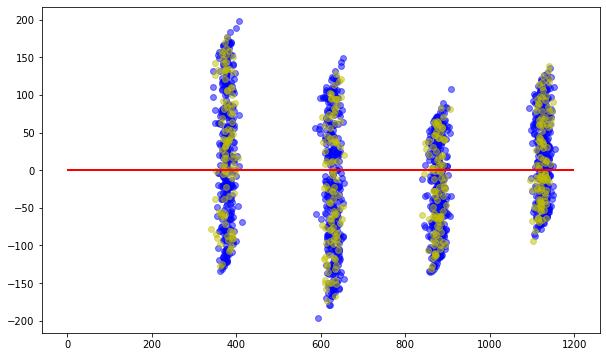

In [98]:
plt.figure(figsize=(10,6))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o',s=35, alpha = 0.5,label='test data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='y', marker='o',s=35, alpha = 0.5,label='test data')
plt.hlines(y=0,xmin=0,xmax=1200,lw=2, color='r')
plt.show()

In [99]:
## Scale the data as before
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [100]:
## Scale the Predictors on both the train and test set
X_tr = std.transform(X_train.values)
X_va = std.transform(X_val.values)
X_te = std.transform(X_test.values)

<a id='Experimentations'></a>

# Experimentations

<a id='LASSO'></a>

## LASSO 

In [101]:
lasso_model = Lasso(alpha = 100)
lasso_model.fit(X_tr,y_train)

Lasso(alpha=100)

In [102]:
list(zip(X_train.columns, lasso_model.coef_))

[('battery_power', 0.0),
 ('blue', 0.0),
 ('speed_m', -0.0),
 ('dual_sim', 0.0),
 ('fc', 0.0),
 ('4G', -0.0),
 ('int_memory', -0.0),
 ('m_dep', 0.0),
 ('mobile_wt', -0.0),
 ('n_cores', 0.0),
 ('pc', 0.0),
 ('px_height', 0.0),
 ('px_width', 0.0),
 ('ram', 0.0),
 ('sc_h', 0.0),
 ('sc_w', 0.0),
 ('talk_time', 0.0),
 ('3G', 0.0),
 ('touch_screen', -0.0),
 ('wifi', 0.0),
 ('price_range', 178.61526017984562)]

In [103]:
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
lasso_grid = GridSearchCV(Lasso(), param_grid=lasso_params).fit(X_tr, y_train)
lasso_grid.best_estimator_

Lasso(alpha=0.03)

In [104]:
lasso_grid.best_score_

0.9265275140050158

In [105]:
lasso_grid = GridSearchCV(Lasso(), param_grid=lasso_params).fit(X_va, y_val)
lasso_grid.best_estimator_

Lasso(alpha=0.03)

In [106]:
lasso_grid.best_score_

0.9152073089219439

In [107]:
lasso_grid = GridSearchCV(Lasso(), param_grid=lasso_params).fit(X_te, y_test)
lasso_grid.best_estimator_

Lasso(alpha=0.03)

In [108]:
lasso_grid.best_score_

0.9287597209117106

<a id='Ridge'></a>

## Ridge

In [109]:
lr_model_ridge = Ridge(alpha =100)
lr_model_ridge.fit(X_tr, y_train)

Ridge(alpha=100)

In [110]:
list(zip(X_train.columns, lr_model_ridge.coef_))

[('battery_power',
  array([ 1.75738905e+01,  9.00385489e-01, -1.11186854e+00, -2.13065039e+00,
          7.94995658e+00, -2.12859710e+00, -1.96673297e+00,  1.44778375e+00,
         -3.58397898e-01,  7.17231224e-01, -6.84377574e+00,  1.31904835e+01,
          9.29453287e+00,  7.99343720e+01,  2.20051380e-01,  9.26468071e-02,
          4.51674744e+00,  2.53653153e+00, -1.56297432e+00, -3.16029287e+00,
          1.84072472e+02]))]

In [111]:
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 900]}
ridge_grid = GridSearchCV(Ridge(), param_grid=ridge_params).fit(X_tr, y_train)
ridge_grid.best_estimator_

Ridge(alpha=200)

In [112]:
ridge_grid.best_score_

0.9049173062442835

In [113]:
ridge_grid = GridSearchCV(Ridge(), param_grid=ridge_params).fit(X_va, y_val)
ridge_grid.best_estimator_

Ridge(alpha=200)

In [114]:
ridge_grid.best_score_

0.8190594837275149

In [115]:
ridge_grid = GridSearchCV(Ridge(), param_grid=ridge_params).fit(X_te, y_test)
ridge_grid.best_estimator_

Ridge(alpha=200)

In [116]:
ridge_grid.best_score_

0.8546927106412252

<a id='Polynomial'></a>

# Polynomial

In [117]:
X1 = X.copy()
X1_train_val, X1_test, y_train_val, y_test = train_test_split(X1, y, test_size=0.2,random_state=100)
X1_train, X1_val, y_train, y_val = train_test_split(X1_train_val, y_train_val, test_size=0.2, random_state=100)
X1['price_range2'] = X1['price_range'] ** 2  

In [118]:
X1.head()

,battery_power,blue,speed_m,dual_sim,fc,4G,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,3G,touch_screen,wifi,price_range,price_range2
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,4
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,4
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,4
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,1


In [119]:
lr1 = LinearRegression() 
#Fit Model
lr1.fit(X1_train,y_train)
#Predict Model  
print(f'R ^2 Train : {lr1.score(X1_train,y_train)}')
print(f'R ^2 VAL : {lr1.score(X1_val,y_val)}')
print(f'R ^2 VAL : {lr1.score(X1_test,y_test)}')

R ^2 Train : 0.9298417906401162
R ^2 VAL : 0.9291028666781841
R ^2 VAL : 0.93380147618825


In [120]:
X2 = X1.copy()
X2_train_val, X2_test, y_train_val, y_test = train_test_split(X2, y, test_size=0.2,random_state=100)
X2_train, X2_val, y_train, y_val = train_test_split(X2_train_val, y_train_val, test_size=0.2, random_state=100)
X2['pr_xx_ram'] = X2['price_range'] * X1['ram']
X2.drop(['price_range','ram'], axis = 1, inplace= True)

In [121]:
X2.head()

,battery_power,blue,speed_m,dual_sim,fc,4G,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,sc_h,sc_w,talk_time,3G,touch_screen,wifi,price_range2,pr_xx_ram
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,9,7,19,0,0,1,1,2549
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,17,3,7,1,1,0,4,5262
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,11,2,9,1,1,0,4,5206
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,16,8,11,1,0,0,4,5538
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,8,2,15,1,1,0,1,1411


In [122]:
lr2 = LinearRegression()
# Fit Model
lr2.fit(X2_train,y_train) 
print(f'R ^2 Train : {lr2.score(X2_train,y_train)}')
print(f'R ^2 VAL : {lr2.score(X2_val,y_val)}')
print(f'R ^2 VAL : {lr2.score(X2_test,y_test)}')

R ^2 Train : 0.9361256364311857
R ^2 VAL : 0.9382156973971598
R ^2 VAL : 0.9407138091785945


In [123]:
X3 = X2.copy()
X3_train_val, X3_test, y_train_val, y_test = train_test_split(X3, y, test_size=0.2,random_state=100)
X3_train, X3_val, y_train, y_val = train_test_split(X3_train_val, y_train_val, test_size=0.2, random_state=100)
X3['batt_log'] = np.log(X3['battery_power'])
X3.drop(['battery_power'], axis = 1, inplace= True)

In [124]:
lr3 = LinearRegression()
# Fit Model
lr3.fit(X3_train,y_train) 
print(f'R ^2 Train : {lr3.score(X3_train,y_train)}')
print(f'R ^2 VAL : {lr3.score(X3_val,y_val)}')
print(f'R ^2 VAL : {lr3.score(X3_test,y_test)}')

R ^2 Train : 0.8322622510387764
R ^2 VAL : 0.8203267530001705
R ^2 VAL : 0.8327166868699317


<a id='Conclusion'></a>
### Conclusion

We use validation data, which isn't used in model training, to measure a candidate model's accuracy. This lets us try many candidate models and keep the best one.

Polynomial Regression has the best results.